## BMI 파일을 활용하여 머신러닝을 학습해보기   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.neighbors import KNeighborsClassifier 


In [2]:
url = 'data/bmi_500.csv'

In [3]:
data = pd.read_csv(url)
data

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [4]:
# 데이터를 확인하기 위해 상위 5개만 먼저 파악
print(data.head(5))
print()

# 데이터의 정보 출력
print(data.info())
print()  

# 데이터의 null값 카운트
print(data.isnull().sum())
print()

   Gender  Height  Weight       Label
0    Male     174      96     Obesity
1    Male     189      87      Normal
2  Female     185     110     Obesity
3  Female     195     104  Overweight
4    Male     149      61  Overweight

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB
None

Gender    0
Height    0
Weight    0
Label     0
dtype: int64



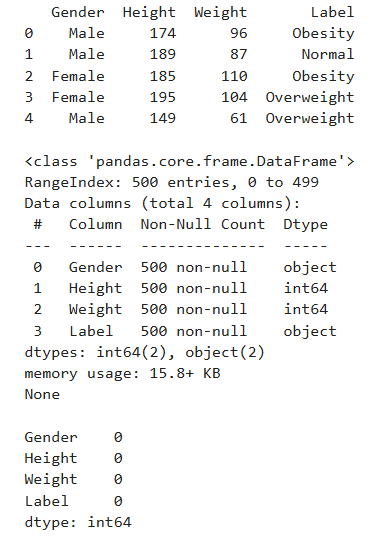
```
로 출력되는데. 
Gender, Height,Labe, Weight 가 입력(문제) 데이터
Label는 출력(정답) 데이터
```

In [5]:
# 문제 데이터를 넣기
X = data.loc['Height' : 'Weight']

# 정답 데이터 분리
y = data['Label']

In [6]:
for i in X.values :
    print(i)

In [7]:
y.unique() 

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

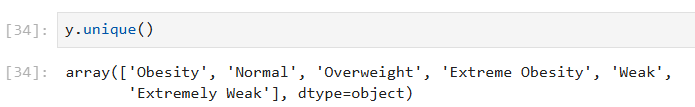

- Extremely Weak : 극심한 저체중
- Weak : 저체중
- Overweight : 과체중
- Obesity : 비만
- Extreme Obesity : 고도비만

In [8]:
# 데이터 편향성을 파악하기 위해 어느정도 분포 되어 있는지 파악하는 과정 

y.value_counts()

Label
Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: count, dtype: int64

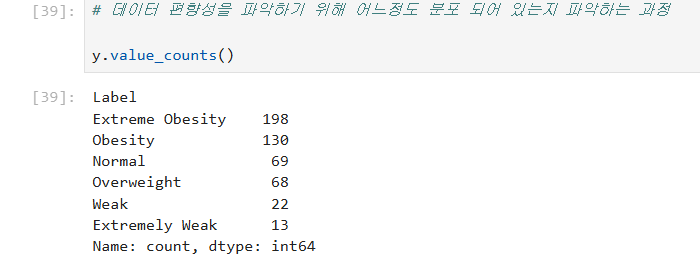

- 좋은 데이터의 경우 모든 데이터가 균등하게 있어야 됨
- 다만 지금의 경우는 저체중이 부족한 것으로 보임(비만 중심)

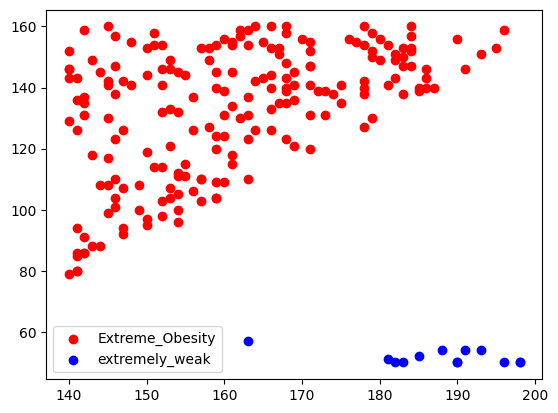

In [16]:
# 데이터 시각화 해보기

extreme_obesity = data[data['Label'] == 'Extreme Obesity']
extremely_weak = data[data['Label'] == 'Extremely Weak']

x_ob = extreme_obesity['Height']
y_ob = extreme_obesity['Weight']
label_ob = 'Extreme_Obesity'
plt.scatter(x = x_ob, y = y_ob, color = 'red', label = label_ob)

x_ek = extremely_weak['Height']
y_ek = extremely_weak['Weight']
label_ek = 'extremely_weak'
plt.scatter(x = x_ek, y = y_ek, color = 'blue', label = label_ek)

plt.legend()

plt.show()